In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
train_data = pd.read_csv('data/train_accident.csv')

In [2]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)
print(train_data.shape)
train_data.tail(5)

(20, 5)


,Date,Killed,Injured,Type,Details
15,"February 28, 2018",15,Dozens,Collision,A head-on crash between two trains killed at l...
16,"February 27, 2019",25,50,Collision,Ramses Station rail disaster: A train smashes ...
17,"March 26, 2021",18,0,Collision,Sohag train collision: A passenger train runs ...
18,"April 15, 2021",0,15,Derailment,A passenger train derails in Minya al-Qamh. Fi...
19,"April 18, 2021",23,139,Derailment,Toukh train accident: A passenger train derail...


In [3]:
# We count the number of NaN values in dataset
x =  train_data.isnull().sum().sum()
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 1


### Challenge: 
The dataset is dirty and needs to be cleaned. <br>
There is one Nan values in the dataset. <br>
The "killed" column with an index of 3 has a value "25-70" <br>
The "Injured" column with index of 1, 2, 15 has a value "many", "hundreds, "dozens" respectively. <br>

Assumptions needs to be made which could distort the results.<br>
All changes would be documented.<br>

In [4]:
# We replace:  all NaN values with 0
#             "25-70" value with the a random number in the range of 25-70
#             "many" with a random number in the range of 200-300
#             "hundreds" with a random number in the range of 100-300
#             "dozens" with a random multiple of 12 number in the range of 11-121
train_data = train_data.fillna(0)
train_data['Killed'][3] = np.random.randint(25, 70)
train_data['Injured'][1] = np.random.randint(200, 300)
train_data['Injured'][2] = np.random.randint(100, 300)
train_data['Injured'][15] = 40

In [5]:
print('25-70 in column "Killed" index 3 was changed to', train_data['Killed'][3])
print('"many" in column "Injured" index 1 was changed to', train_data['Injured'][1])
print('"hundreds" in column "Injured" index 2 was changed to', train_data['Injured'][2])
print()
print('"dozens" in column "Injured" index 15 was changed to', train_data['Injured'][15], 'based on a credible news article')
print("Source")
print('https://www.aljazeera.com/news/2018/2/28/egypt-train-collision-kills-15-health-ministry')

25-70 in column "Killed" index 3 was changed to 68
"many" in column "Injured" index 1 was changed to 215
"hundreds" in column "Injured" index 2 was changed to 199

"dozens" in column "Injured" index 15 was changed to 40 based on a credible news article
Source
https://www.aljazeera.com/news/2018/2/28/egypt-train-collision-kills-15-health-ministry


In [6]:
# Convert "Killed" and "Injured" values from object to integers  
train_data['Killed'] = pd.to_numeric(train_data['Killed'])
train_data['Injured'] = pd.to_numeric(train_data['Injured'])

In [7]:
train_data

,Date,Killed,Injured,Type,Details
0,"April 29, 1931",48,0,fire,The rear cars of a passenger train from Alexan...
1,"January 30, 1954",28,215,Run over,"President Mohammed Naguib visits Ibyar, a vill..."
2,"March 23, 1956",0,199,Derailment,A speeding express train of the Egyptian state...
3,"September 8, 1977",68,0,Derailment,As an 11-car Cairo to Aswan express passes Asy...
4,"June 10, 1983",22,46,Collision,One train crashes into the rear of another sou...
5,"February 20, 2002",383,0,fire,2002 El Ayyat railway accident A train packed ...
6,"August 21, 2006",57,128,Collision,Qalyoub train collision – Two trains collide i...
7,"September 4, 2006",5,30,Collision,A passenger train collides with a freight trai...
8,"July 16, 2008",44,33,Collision,At least 44 people are killed and 33 injured w...
9,"October 24, 2009",18,0,Collision,2009 El Ayyat railway accident – A passenger t...


C:\Users\Sage\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


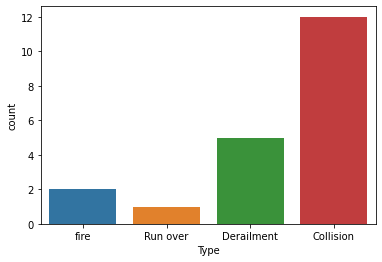

In [8]:
sb.countplot(train_data.Type);

In [9]:
acc_type = train_data.groupby(['Type'])['Killed', 'Injured'].sum()
acc_type

C:\Users\Sage\AppData\Local\Temp/ipykernel_14076/4060654020.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  acc_type = train_data.groupby(['Type'])['Killed', 'Injured'].sum()


,Killed,Injured
Type,,
Collision,321,702
Derailment,91,368
Run over,28,215
fire,431,0


In [10]:
killed_values = acc_type['Killed'].values
injured_values = acc_type['Injured'].values
labels = acc_type.index

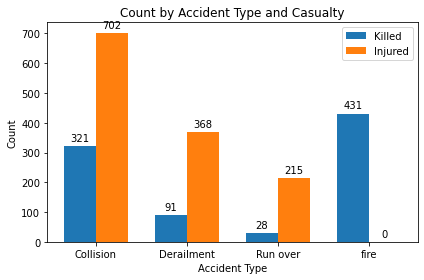

In [11]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, killed_values, width, label='Killed')
rects2 = ax.bar(x + width/2, injured_values, width, label='Injured')

ax.set_title('Count by Accident Type and Casualty')
ax.set_xlabel('Accident Type')
ax.set_ylabel('Count')
ax.legend()
ax.set_xticks(range(len(labels)), labels=labels)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()